# Data Visualization for Financial Analysis

In this work, crypto data will be imported using Binance API and visualized for financial analysis.

**See also** Binance Trader Bot with Python: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/financial-tools/binance-bot.ipynb

**See also** Gate.io Trader Bot with Python: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/financial-tools/gate-io-bot.ipynb

**See also** Technical Indicators for Financial Analysis with Python (Jupyter): https://github.com/DrFarukAydin/data-science-portfolio/blob/main/financial-tools/technical-indicators-finance.ipynb

<br><br>

**WARNING!!**

<li>The strategies used in this section are <b>not investment advices</b>. They are shown for only educational purposes.

<br><br>

## 1. Importing Libraries and Data

<br>**Importing Libraries**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import sqlalchemy
import time
import os
import asyncio
import warnings
warnings.filterwarnings('ignore')
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import pandas_ta as pta
import matplotlib.dates as mdates


**Note** that some libraries should be installed with pip install.

<br>**Importing Data**

In [57]:
df = pd.read_csv("btc_df.csv")

In [58]:
df.head()


,Time,Open,High,Low,Close,Volume,Close_time,volume,Number_of_trades,Taker_buy_base_asset_vol,...,body_length,high_togreen,low_togreen,high_tored,low_tored,rsi,supertrend,upt,dt,st_signal
0,2022-07-14 09:15:00,19770.39,19818.35,19747.12,19748.62,1456.03190,1.657791e+12,2.880187e+07,38877.0,740.79937,...,-0.110114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2022-07-14 09:30:00,19747.25,19798.15,19678.26,19794.56,2221.47521,1.657792e+12,4.384272e+07,53546.0,1029.51594,...,0.239578,NaN,NaN,NaN,NaN,NaN,19932.569,NaN,19932.569,0
2,2022-07-14 09:45:00,19794.55,19839.65,19760.33,19823.11,2719.07760,1.657793e+12,5.383640e+07,59292.0,1343.06868,...,0.144282,NaN,NaN,NaN,NaN,NaN,19932.569,NaN,19932.569,0
3,2022-07-14 10:00:00,19822.54,19847.27,19780.00,19807.73,2071.75418,1.657794e+12,4.105084e+07,46963.0,1025.27111,...,-0.074713,NaN,NaN,NaN,NaN,NaN,19932.569,NaN,19932.569,0
4,2022-07-14 10:15:00,19807.73,19830.00,19754.81,19797.52,1420.72239,1.657795e+12,2.811504e+07,38976.0,709.83030,...,-0.051546,NaN,NaN,NaN,NaN,95.657998,19932.569,NaN,19932.569,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time                       40 non-null     object 
 1   Open                       40 non-null     float64
 2   High                       40 non-null     float64
 3   Low                        40 non-null     float64
 4   Close                      40 non-null     float64
 5   Volume                     40 non-null     float64
 6   Close_time                 40 non-null     float64
 7   volume                     40 non-null     float64
 8   Number_of_trades           40 non-null     float64
 9   Taker_buy_base_asset_vol   40 non-null     float64
 10  Taker_buy_quote_asset_vol  40 non-null     float64
 11  Ignore                     40 non-null     float64
 12  signal                     40 non-null     object 
 13  greenline                  33 non-null     float64
 

In [60]:
df["Time"] = pd.to_datetime(df["Time"])

In [61]:
df = df.set_index("Time")

<br><br><br>

## 2. Visualization

### 2.1. Candlesticks with MOST Indicator

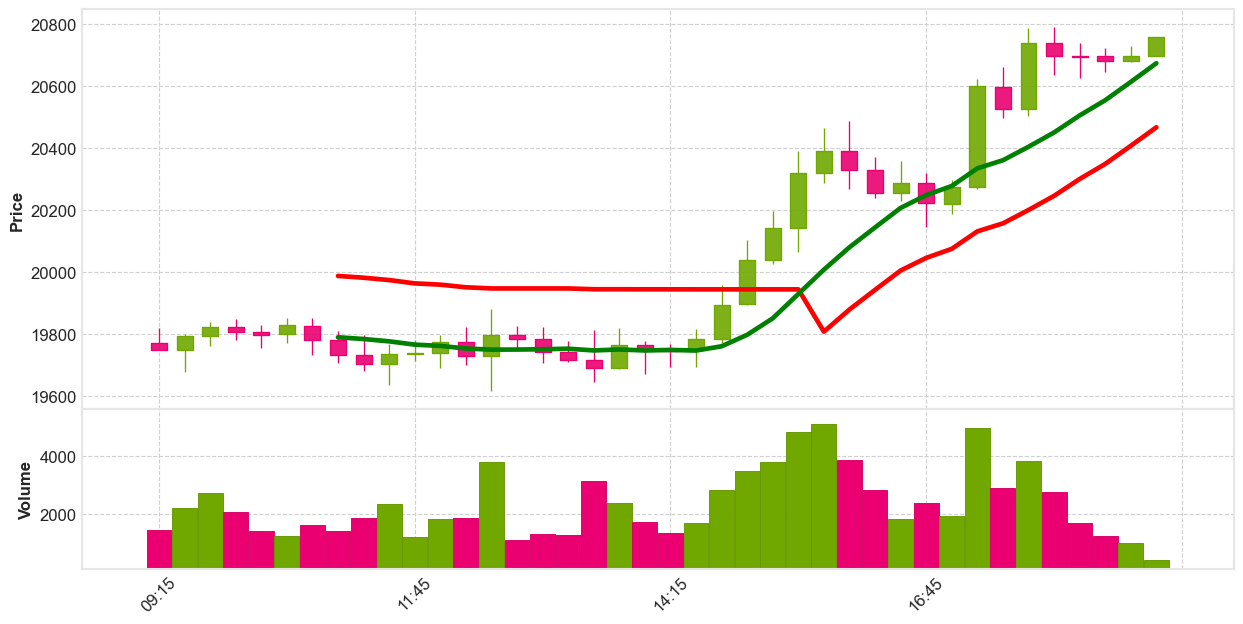

In [73]:
data = df
ohlc = df[["Open","High","Low","Close", "Volume"]]

ax = mpf.make_addplot(data["redline"],color = "red")
ax2 = mpf.make_addplot(data["greenline"], color = "green")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax,ax2], figsize =(16,8), volume=True)


<br><br><br>

### 2.2. Candlesticks with SuperTrend

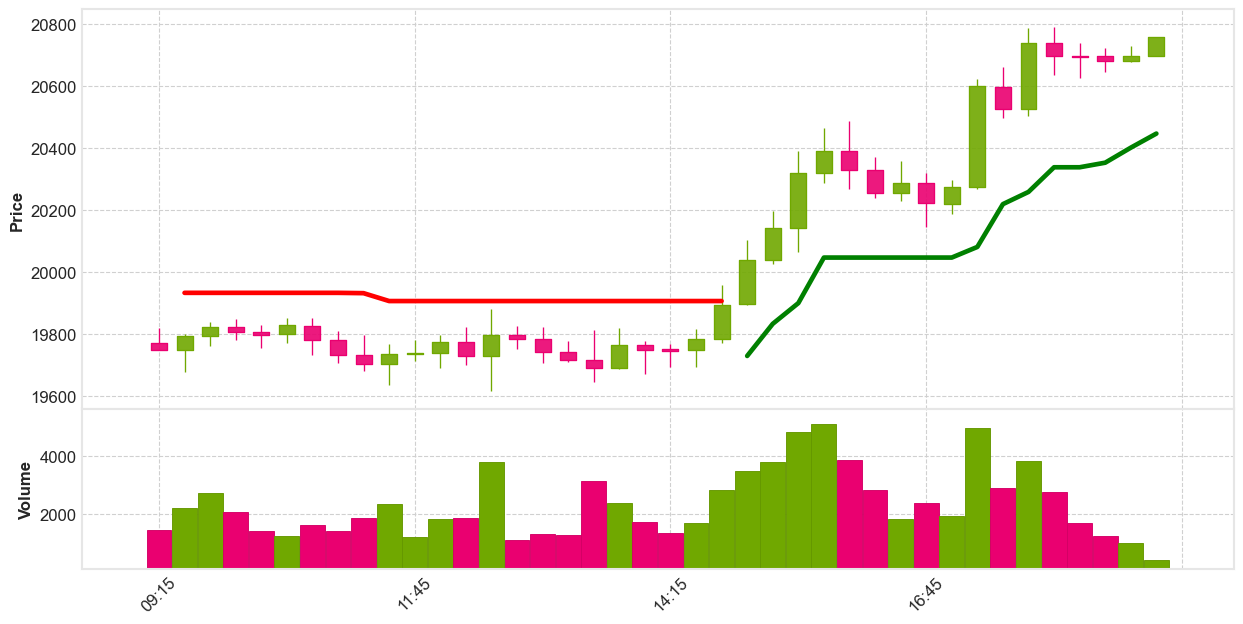

In [81]:
data = df
ohlc = df.iloc[-100:][["Open","High","Low","Close", "Volume"]]

ax2 = mpf.make_addplot(data["upt"], color = "green")
ax3 = mpf.make_addplot(data["dt"], color = "red")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax2,ax3], figsize =(16,8), volume=True);

<br><br><br>

### 2.3. Candlesticks with Moving Averages

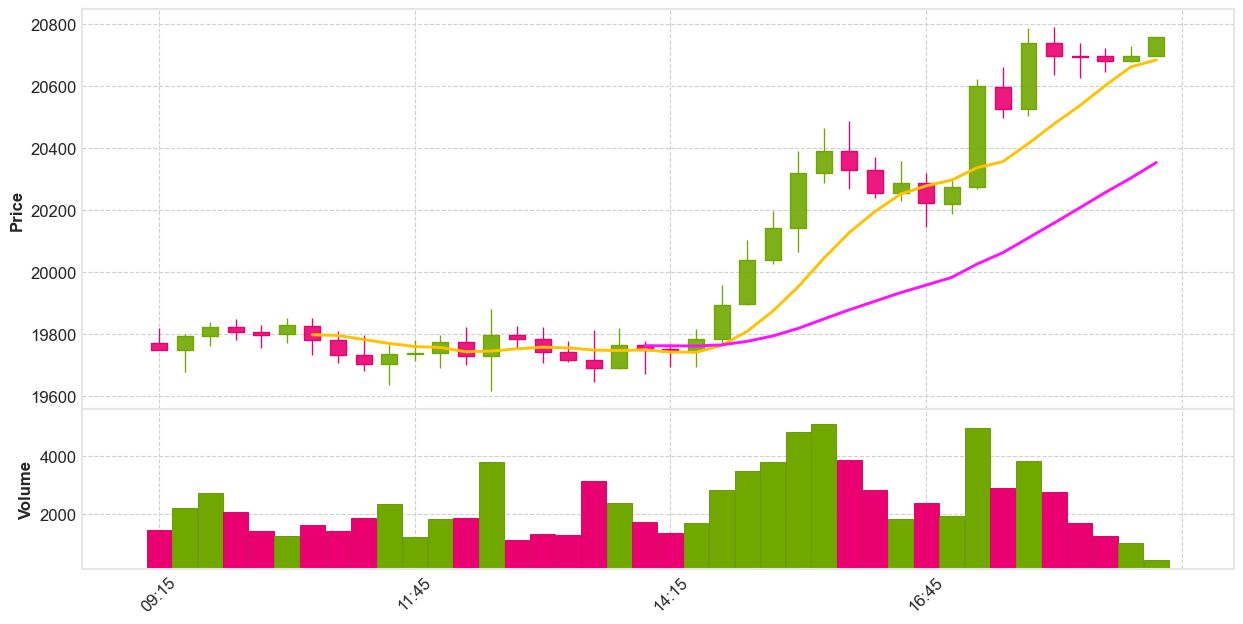

In [84]:
data = df
ohlc = df.iloc[-100:][["Open","High","Low","Close", "Volume"]]

mpf.plot(ohlc, type="candle", style="binance", mav=(7,20), figsize =(16,8), volume=True)

<br><br><br>

### 2.4. Price LinePlot

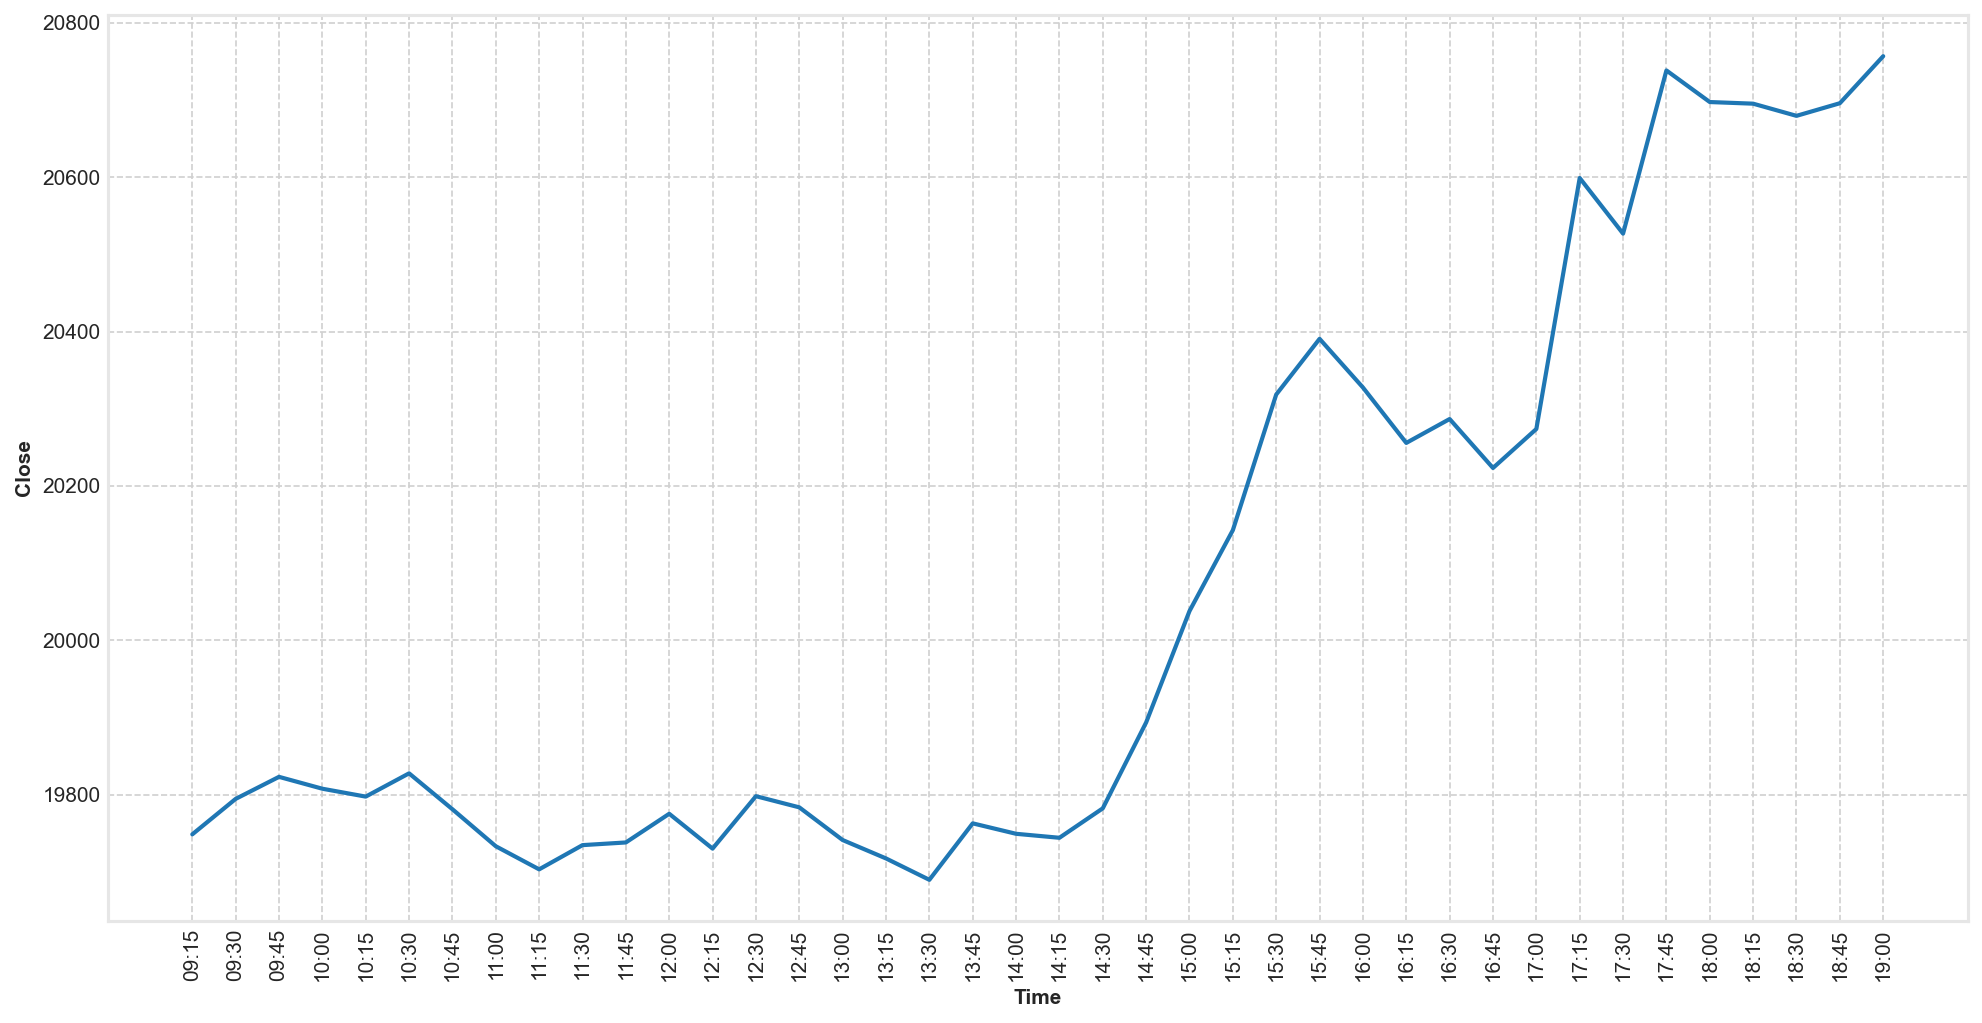

In [103]:
fig, ax = plt.subplots(figsize=(16,8), dpi=150)
ax = sns.lineplot(x=df.index, y=df["Close"])
h_fmt = mdates.DateFormatter('%H:%M')
locator = mdates.MinuteLocator(interval = 15)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_ticks(df.index);

<br><br><br>

### 2.5. RSI

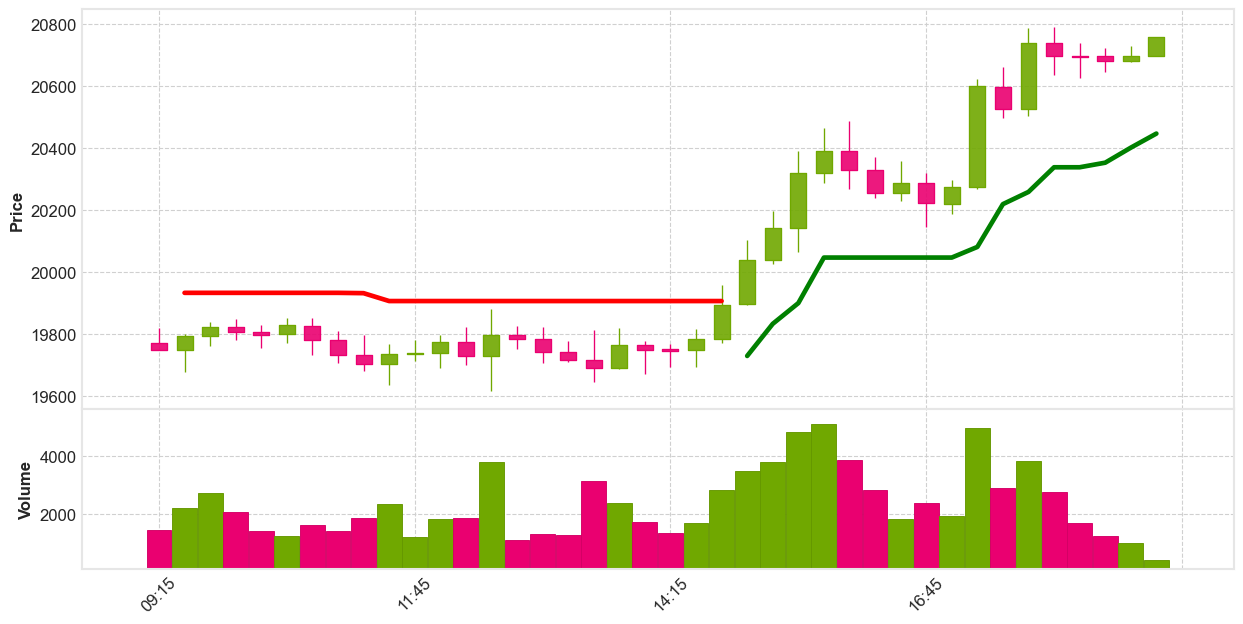

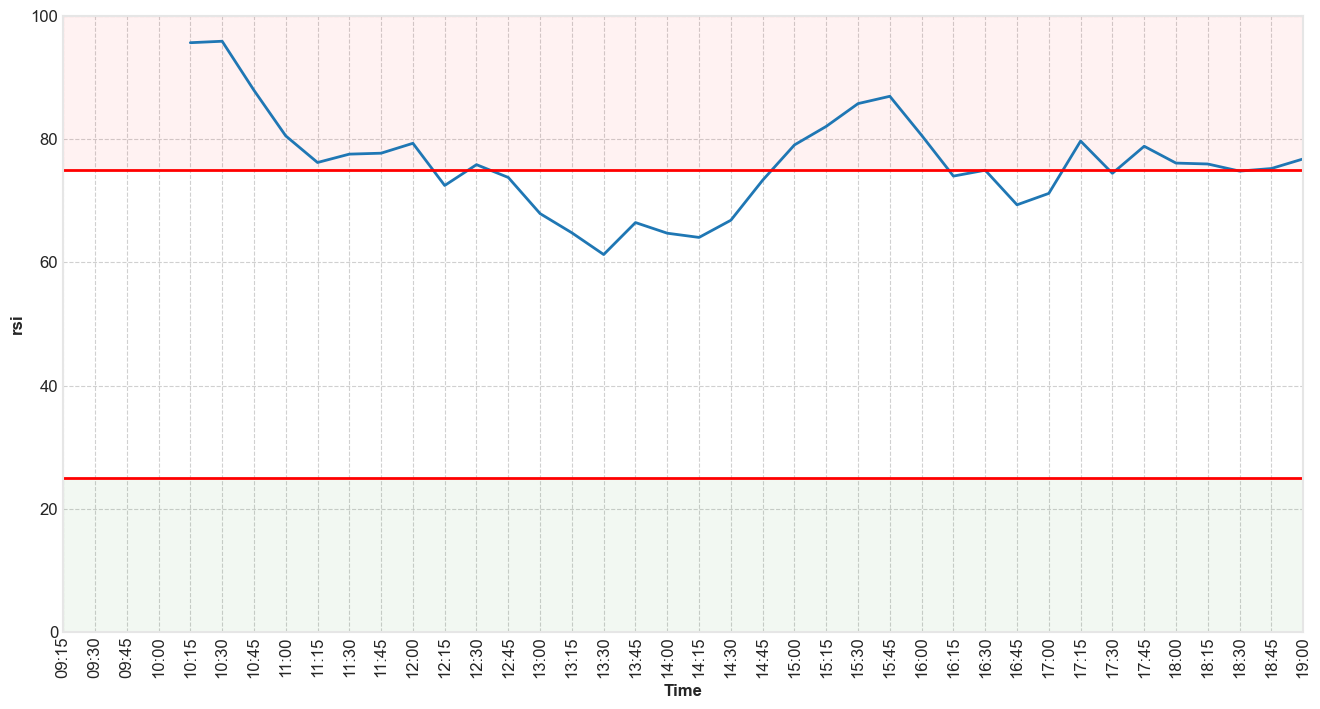

In [114]:
#Candlesticks
data = df
ohlc = df.iloc[-100:][["Open","High","Low","Close", "Volume"]]

ax2 = mpf.make_addplot(data["upt"], color = "green")
ax3 = mpf.make_addplot(data["dt"], color = "red")
mpf.plot(ohlc, type="candle", style="binance", addplot = [ax2,ax3], figsize =(16,8), volume=True);


#RSI
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.lineplot(x=df.index, y=df["rsi"])
plt.hlines(y = 75, xmin=df.index[0], xmax=df.index[-1], color="red")
plt.hlines(y = 25, xmin=df.index[0], xmax=df.index[-1], color="red")
ax.axhspan(75, 100, alpha=0.05, color='red')
ax.axhspan(0, 25, alpha=0.05, color='green')
plt.ylim((0,100))
plt.xlim((df.index[0],df.index[-1]))

h_fmt = mdates.DateFormatter('%H:%M')
locator = mdates.MinuteLocator(interval = 15)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_ticks(df.index);